In [1]:
import numpy as np

from itkwidgets import view
import matplotlib.pyplot as plt

import site
site.addsitedir("../src")

from mocoreg import mocoreg

In [2]:
app = mocoreg(smooth_registrations=True, debug=False)
basename = '../Data/bmenvRyanNonPermuted_6'
app.read_4d_bmode_matlab_file(basename+".dat", nframes=200, nlateral=102, nelevation=102, ndepth=92)

smooth_registrations True
feature_size 0.75
multi_frame_smoothing_window_size 3
keyframe_transform_smoothing_window_size 4
max_keyframe_interval 33
keyframe_search_stepsize 2


In [3]:
app.compute_keyframes()

In [4]:
print(app.keyframes)

[0, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 54, 58, 62, 68, 74, 82, 92, 106, 124, 150, 182, 199]


In [5]:
import time
start_time = time.perf_counter()
app.register_keyframes(app.keyframes)
end_time = time.perf_counter()

print("Time required for registration (seconds) = ", end_time-start_time)

Registering set 1 of 22: Frame = 32


itkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'itkImageF4'
vectoritkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'vectoritkImageF4'


Registering set 2 of 22: Frame = 34
Registering set 3 of 22: Frame = 36
Registering set 4 of 22: Frame = 38
Registering set 5 of 22: Frame = 40
Registering set 6 of 22: Frame = 42
Registering set 7 of 22: Frame = 44
Registering set 8 of 22: Frame = 46
Registering set 9 of 22: Frame = 48
Registering set 10 of 22: Frame = 50
Registering set 11 of 22: Frame = 54
Registering set 12 of 22: Frame = 58
Registering set 13 of 22: Frame = 62
Registering set 14 of 22: Frame = 68
Registering set 15 of 22: Frame = 74
Registering set 16 of 22: Frame = 82
Registering set 17 of 22: Frame = 92
Registering set 18 of 22: Frame = 106
Registering set 19 of 22: Frame = 124
Registering set 20 of 22: Frame = 150
Registering set 21 of 22: Frame = 182
Registering set 22 of 22: Frame = 199
Done!
Time required for registration (seconds) =  205.3534533


In [6]:
app.interpolate_keyframe_transforms()
print(app.keyframe_transforms[0])
print(app.transforms[1])

AffineTransform (00000284843DA290)
  RTTI typeinfo:   class itk::AffineTransform<double,3>
  Reference Count: 1
  Modified Time: 517432
  Debug: Off
  Object Name: 
  Observers: 
    none
  Matrix: 
    0.996667 0.00131594 0.00276324 
    -0.00227456 1.01052 0.00190986 
    -0.00306432 -0.00120504 0.998669 
  Offset: [-1.79565, -0.22907, -0.164679]
  Center: [46, 51, 51]
  Translation: [-1.74094, 0.300336, -0.434973]
  Inverse: 
    1.00333 -0.00130989 -0.00277364 
    0.00225255 0.989582 -0.00189872 
    0.00308135 0.00119005 1.00132 
  Singular: 0

ComposeScaleSkewVersor3DTransform (0000028508DFAFC0)
  RTTI typeinfo:   class itk::ComposeScaleSkewVersor3DTransform<double>
  Reference Count: 1
  Modified Time: 25143397
  Debug: Off
  Object Name: 
  Observers: 
    none
  Matrix: 
    0.999718 6.21315e-05 2.17043e-06 
    -8.89521e-05 1.00023 -1.12469e-05 
    4.03128e-05 6.61572e-05 1.00015 
  Offset: [-0.0254917, 0.000697121, -0.0190703]
  Center: [46, 51, 51]
  Translation: [-0.0351

In [7]:
app.apply_transforms()

In [8]:
tmp = [ list(app.transforms[x].GetParameters()) for x in range(len(app.transforms))]
#tmp = np.array(tmp)
#tmp = np.where(tmp>1,1,tmp)
print(len(tmp), len(app.data_array))
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])

200 200


In [9]:
print(tmp[2])
print(app.smooth_keyframe_transform_parameters(1)[0])

[6.614129033112189e-05, -4.0327139634003106e-05, -8.897583390530393e-05, -0.07037261420487138, 0.015501289064738973, -0.012264603327190848, 0.9994359233055151, 1.0004595727125691, 1.0003023334784742, -5.3741993688498516e-05, 8.502743696568481e-05, 0.00010978744950703954]
0.0012272224215419052


In [10]:
from matplotlib import pyplot as plt

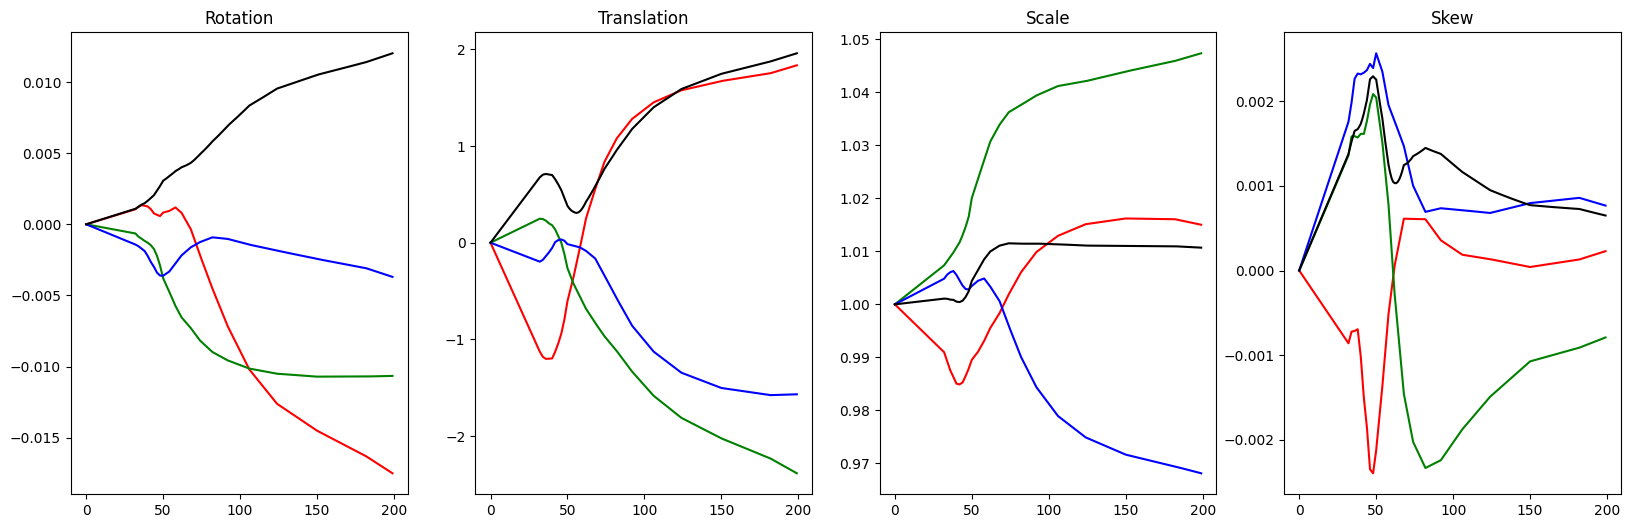

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
rlim = plt.gca().get_ylim()
plt.title("Rotation")
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
tlim = plt.gca().get_ylim()
plt.title("Translation")
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
slim = plt.gca().get_ylim()
plt.title("Scale")
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
klim = plt.gca().get_ylim()
plt.title("Skew");

In [12]:
import itk

yOrg = app.data_array[:,50,:,:].astype(np.float32)
yReg = app.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yOrg), basename+"_org.mha")
itk.imwrite(itk.GetImageFromArray(yReg), basename+"_reg.mha")
app.save_matrix_transforms(basename+"_reg_matrix.tfm")

In [13]:
meansq, diffs = app.compute_inter_keyframe_diffs()
meansq_reg, diffs_reg = app.compute_inter_keyframe_diffs(data_array=app.data_array_reg)

In [14]:
print( np.sum(np.abs(app.data_array[0] - app.data_array[10])))
print( np.sum(np.abs(app.data_array_reg[0] - app.data_array_reg[10])))

24062594404.632046
19957999149.80787


In [15]:
app2 = mocoreg(smooth_registrations=True)
app2.data_array = app.data_array_reg
app2.compute_keyframes()
print("Using new frames =", app2.keyframes)
start_time2 = time.perf_counter()
app2.register_keyframes()  # app.keyframes)
end_time2 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time2-start_time2)

smooth_registrations True
feature_size 0.75
multi_frame_smoothing_window_size 3
keyframe_transform_smoothing_window_size 4
max_keyframe_interval 33
keyframe_search_stepsize 2
Using new frames = [0, 32, 34, 36, 38, 40, 42, 44, 46, 50, 54, 58, 62, 68, 74, 82, 92, 104, 120, 142, 174, 199]
Registering set 1 of 21: Frame = 32
Registering set 2 of 21: Frame = 34
Registering set 3 of 21: Frame = 36
Registering set 4 of 21: Frame = 38
Registering set 5 of 21: Frame = 40
Registering set 6 of 21: Frame = 42
Registering set 7 of 21: Frame = 44
Registering set 8 of 21: Frame = 46
Registering set 9 of 21: Frame = 50
Registering set 10 of 21: Frame = 54
Registering set 11 of 21: Frame = 58
Registering set 12 of 21: Frame = 62
Registering set 13 of 21: Frame = 68
Registering set 14 of 21: Frame = 74
Registering set 15 of 21: Frame = 82
Registering set 16 of 21: Frame = 92
Registering set 17 of 21: Frame = 104
Registering set 18 of 21: Frame = 120
Registering set 19 of 21: Frame = 142
Registering set 

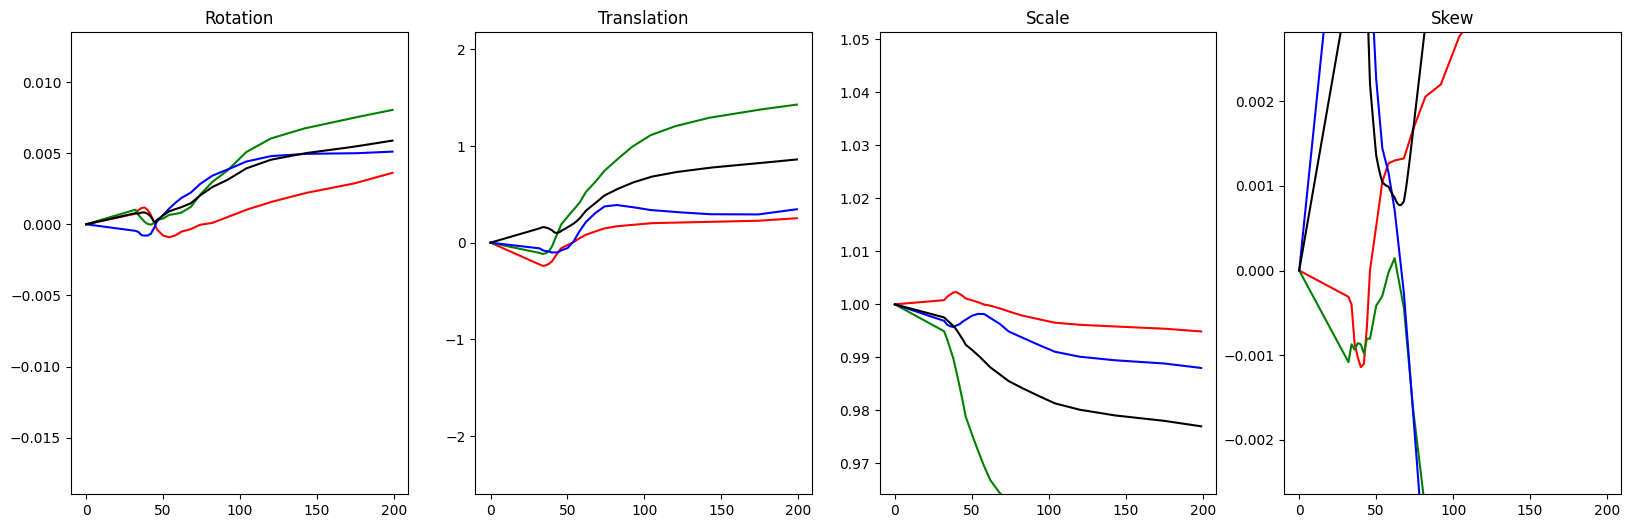

In [16]:
app2.interpolate_keyframe_transforms()
app2.apply_transforms()
tmp = [ list(app2.transforms[x].GetParameters()) for x in range(len(app2.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);

In [17]:
yRegReg = app2.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yRegReg), basename+"_regreg.mha")
app2.save_matrix_transforms(basename+"_regreg_matrix.tfm")

In [18]:
app3 = mocoreg(smooth_registrations=True)
app3.data_array = app2.data_array_reg
app3.compute_keyframes()
print("Using new frames =", app3.keyframes)
start_time3 = time.perf_counter()
app3.register_keyframes()  # app.keyframes)
end_time3 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time3-start_time3)

smooth_registrations True
feature_size 0.75
multi_frame_smoothing_window_size 3
keyframe_transform_smoothing_window_size 4
max_keyframe_interval 33
keyframe_search_stepsize 2
Using new frames = [0, 32, 34, 36, 38, 40, 42, 44, 46, 48, 52, 56, 60, 64, 70, 76, 84, 94, 108, 126, 152, 184, 199]
Registering set 1 of 22: Frame = 32
Registering set 2 of 22: Frame = 34
Registering set 3 of 22: Frame = 36
Registering set 4 of 22: Frame = 38
Registering set 5 of 22: Frame = 40
Registering set 6 of 22: Frame = 42
Registering set 7 of 22: Frame = 44
Registering set 8 of 22: Frame = 46
Registering set 9 of 22: Frame = 48
Registering set 10 of 22: Frame = 52
Registering set 11 of 22: Frame = 56
Registering set 12 of 22: Frame = 60
Registering set 13 of 22: Frame = 64
Registering set 14 of 22: Frame = 70
Registering set 15 of 22: Frame = 76
Registering set 16 of 22: Frame = 84
Registering set 17 of 22: Frame = 94
Registering set 18 of 22: Frame = 108
Registering set 19 of 22: Frame = 126
Registering s

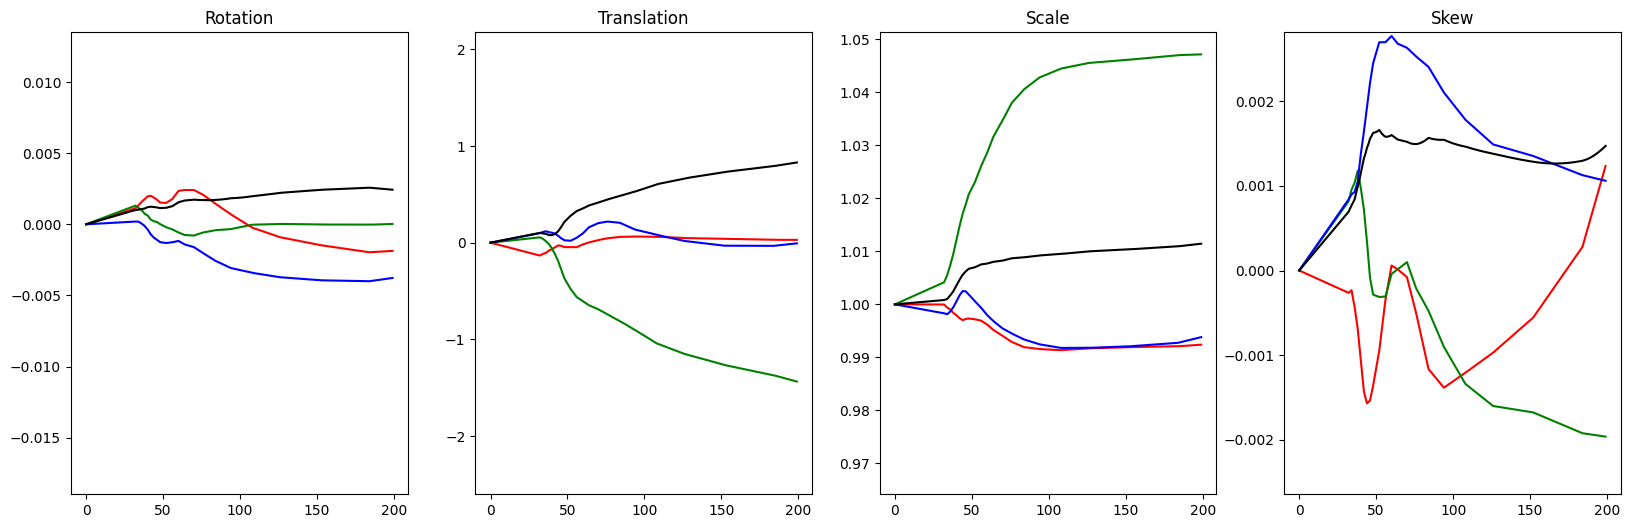

In [19]:
app3.interpolate_keyframe_transforms()
app3.apply_transforms()
tmp = [ list(app3.transforms[x].GetParameters()) for x in range(len(app3.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);

In [20]:
yRegRegReg = app3.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yRegRegReg), basename+"_regregreg.mha")
app3.save_matrix_transforms(basename+"_regregreg_matrix.tfm")